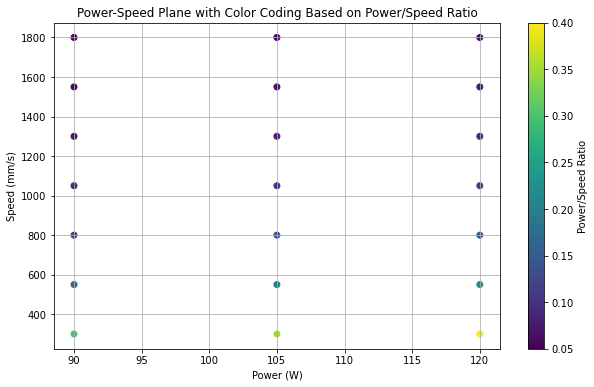

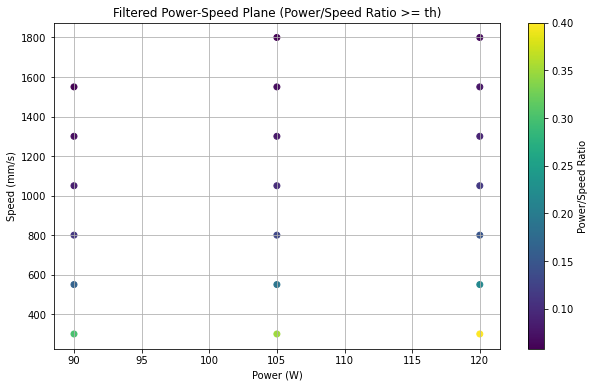

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Define the parameters
min_power = 90  # in watts
max_power = 120  # in watts
min_speed = 300  # in mm/s
max_speed = 1800  # in mm/s
th = 0.055  # power/speed ratio threshold

# Number of powers and speeds
num_powers = 3
num_speeds = 7

# Generating the powers and speeds
powers = np.linspace(min_power, max_power, num_powers)
speeds = np.linspace(min_speed, max_speed, num_speeds)

# Creating a meshgrid for plotting
P, S = np.meshgrid(powers, speeds)
flat_powers = P.flatten()
flat_speeds = S.flatten()

# Calculate Power/Speed ratio for color coding
power_speed_ratio = P / S

# Plotting with color coding
plt.figure(figsize=(10, 6))
scatter = plt.scatter(P, S, c=power_speed_ratio, cmap='viridis')
plt.xlabel('Power (W)')
plt.ylabel('Speed (mm/s)')
plt.title('Power-Speed Plane with Color Coding Based on Power/Speed Ratio')
plt.colorbar(scatter, label='Power/Speed Ratio')
plt.grid(True)
plt.show()

# Filter out parameters where power_speed_ratio is less than th
filter_condition = power_speed_ratio.flatten() >= th
filtered_speeds = flat_speeds[filter_condition]
filtered_powers = flat_powers[filter_condition]
filtered_power_speed_ratio = power_speed_ratio.flatten()[filter_condition]

# Plotting the filtered parameters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(filtered_powers, filtered_speeds, c=filtered_power_speed_ratio, cmap='viridis')
plt.xlabel('Power (W)')
plt.ylabel('Speed (mm/s)')
plt.title('Filtered Power-Speed Plane (Power/Speed Ratio >= th)')
plt.colorbar(scatter, label='Power/Speed Ratio')
plt.grid(True)
plt.show()


In [2]:
np.min(power_speed_ratio), np.max(power_speed_ratio)

(0.05, 0.4)

In [3]:
filtered_speeds.shape

(20,)

In [4]:
import pandas as pd

# Create a DataFrame with the filtered parameters
df = pd.DataFrame({
    "Speed (mm/s)": filtered_speeds,
    "Power (W)": filtered_powers,
    "Power perc (%)": (filtered_powers / 500) * 100  # 500W is the reference for percentage calculation
})

# Setting a seed for reproducibility
np.random.seed(42)

# Create an Excel writer with the updated path
excel_file_path_with_seed = './experiment_parameters.xlsx'
writer_with_seed = pd.ExcelWriter(excel_file_path_with_seed, engine='xlsxwriter')

# Randomize the order and save in 4 different sheets with the same seed
for sheet_number in range(1, 4):
    df_randomized = df.sample(frac=1, random_state=42+sheet_number).reset_index(drop=True)
    df_randomized['#'] = df_randomized.index + 1  # Add a progressive number
    df_randomized.to_excel(writer_with_seed, sheet_name=f'Cube{sheet_number}', index=False)

# Save the Excel file
writer_with_seed.save()


ModuleNotFoundError: No module named 'xlsxwriter'

In [ ]:
# Generate new parameters for the forth cube
new_power = 105  # constant power 
new_speeds = np.linspace(min_speed, max_speed, 20)  # 20 speeds from 300 to 1800

# Create DataFrame for the new parameters
df_new_params = pd.DataFrame({
    "Speed (mm/s)": new_speeds,
    "Power (W)": new_power,
    "Power perc (%)": (new_power / 500) * 100  # 500W is the reference for percentage calculation
})

# Randomize the order of the new parameters
np.random.seed(42)  # Resetting the seed
df_new_params_randomized = df_new_params.sample(frac=1).reset_index(drop=True)
df_new_params_randomized['#'] = df_new_params_randomized.index + 1

# Append the new sheet to the existing Excel file
with pd.ExcelWriter(excel_file_path_with_seed, engine='openpyxl', mode='a') as writer_corrected:
    df_new_params_randomized.to_excel(writer_corrected, sheet_name='Cube4', index=False)

# Provide the path to the updated Excel file
excel_file_path_with_seed
